In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!cp -r '/content/gdrive/MyDrive/flower_photos' /content/

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
PATH = "/content/flower_photos/"

BATCH_SIZE = 256
IMG_SIZE = (160,160)
BUFF_SIZE = BATCH_SIZE * 5

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(PATH, validation_split=0.2, subset="training", seed=123, image_size=IMG_SIZE, batch_size=BATCH_SIZE)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(PATH, validation_split=0.2, subset="validation", seed=123, image_size=IMG_SIZE, batch_size=BATCH_SIZE)

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


# InceptionV3 without pre-trained weights and Adding dropout 

In [ ]:
# building model
augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1 / 127.5, offset=-1)
])

base_model = tf.keras.applications.InceptionV3(include_top=False, weights=None,input_shape=(160,160,3))

flatten = tf.keras.layers.Flatten()
drop_out = tf.keras.layers.Dropout(0.2)
prediction_layer = tf.keras.layers.Dense(5)

inputs = tf.keras.Input(shape=(160,160,3))

x = augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = drop_out(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs)


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
history = model.fit(train_dataset, epochs=250, validation_data=val_dataset, verbose=1)

Epoch 1/250
12/12 [==============================] - 33s 1s/step - loss: 1.9307 - accuracy: 0.2111 - val_loss: 1.6077 - val_accuracy: 0.2398
Epoch 2/250
12/12 [==============================] - 10s 841ms/step - loss: 1.7196 - accuracy: 0.2763 - val_loss: 1.6068 - val_accuracy: 0.2071
Epoch 3/250
12/12 [==============================] - 10s 840ms/step - loss: 1.6024 - accuracy: 0.3170 - val_loss: 1.6061 - val_accuracy: 0.2398
Epoch 4/250
12/12 [==============================] - 10s 841ms/step - loss: 1.5641 - accuracy: 0.3602 - val_loss: 1.6056 - val_accuracy: 0.2398
Epoch 5/250
12/12 [==============================] - 10s 841ms/step - loss: 1.4999 - accuracy: 0.3749 - val_loss: 1.6057 - val_accuracy: 0.2398
Epoch 6/250
12/12 [==============================] - 10s 843ms/step - loss: 1.4633 - accuracy: 0.4084 - val_loss: 1.6088 - val_accuracy: 0.2398
Epoch 7/250
12/12 [==============================] - 10s 847ms/step - loss: 1.4119 - accuracy: 0.4352 - val_loss: 1.6112 - val_accuracy: 0.

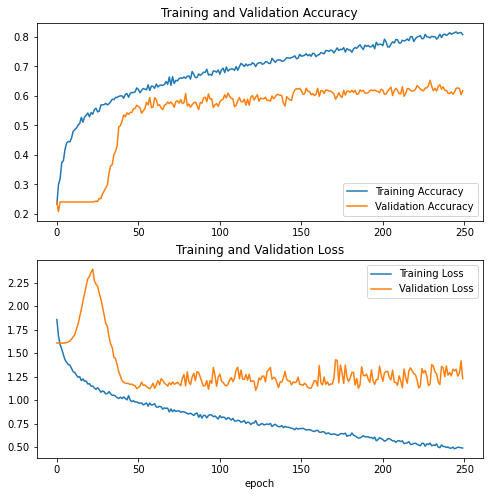

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Khi thêm lớp Drop-out ở trước tầng prediction. Độ chính xác và độ lỗi của mô hình dường như không thay đổi.

# InceptionV3 with pre-trained weight and adding dropout

In [ ]:
# building model
augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1 / 127.5, offset=-1)
])

base_model = tf.keras.applications.InceptionV3(include_top=False, weights="imagenet",input_shape=(160,160,3))

flatten = tf.keras.layers.Flatten()
drop_out = tf.keras.layers.Dropout(0.2)
prediction_layer = tf.keras.layers.Dense(5)

inputs = tf.keras.Input(shape=(160,160,3))

x = augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = drop_out(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs)


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
histori_trans = model.fit(train_dataset, epochs=250, validation_data=val_dataset, verbose=1)

Epoch 1/250
12/12 [==============================] - 17s 937ms/step - loss: 1.9316 - accuracy: 0.2044 - val_loss: 1.8479 - val_accuracy: 0.3338
Epoch 2/250
12/12 [==============================] - 10s 851ms/step - loss: 1.5684 - accuracy: 0.3440 - val_loss: 1.4448 - val_accuracy: 0.4728
Epoch 3/250
12/12 [==============================] - 10s 857ms/step - loss: 1.3783 - accuracy: 0.4307 - val_loss: 1.2521 - val_accuracy: 0.5313
Epoch 4/250
12/12 [==============================] - 10s 858ms/step - loss: 1.2490 - accuracy: 0.5081 - val_loss: 1.1058 - val_accuracy: 0.5886
Epoch 5/250
12/12 [==============================] - 10s 849ms/step - loss: 1.1043 - accuracy: 0.5803 - val_loss: 0.9819 - val_accuracy: 0.6512
Epoch 6/250
12/12 [==============================] - 10s 841ms/step - loss: 0.9828 - accuracy: 0.6333 - val_loss: 0.8892 - val_accuracy: 0.6907
Epoch 7/250
12/12 [==============================] - 10s 836ms/step - loss: 0.9060 - accuracy: 0.6715 - val_loss: 0.8219 - val_accuracy:

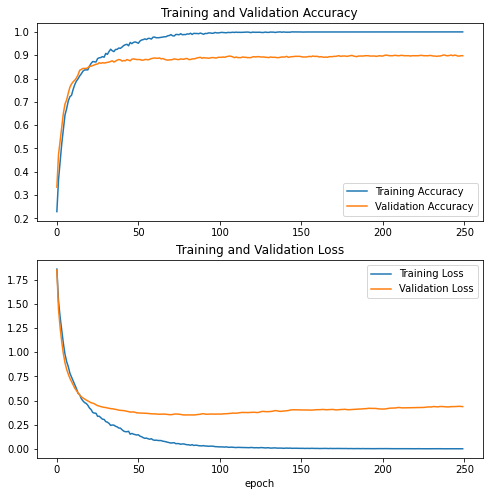

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(histori_trans.history['accuracy'], label='Training Accuracy')
plt.plot(histori_trans.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(histori_trans.history['loss'], label='Training Loss')
plt.plot(histori_trans.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Khi sử dụng Dropout layer, độ chính xác ghi nhận đạt tới gần 90%, trong khi đó, nếu không sử dụng dropout, độ chính xác chỉ đạt khoảng 85%. Độ chính xác cao hơn khoảng 5%

# InceptionV3 fine-tune and dropout


In [ ]:
# building model
augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1 / 127.5, offset=-1)
])

base_model = tf.keras.applications.InceptionV3(include_top=False, weights="imagenet",input_shape=(160,160,3))

freeze_layers = 150
for layer in base_model.layers[:150]:
  layer.trainable = False


flatten = tf.keras.layers.Flatten()
drop_out = tf.keras.layers.Dropout(0.2)
prediction_layer = tf.keras.layers.Dense(5)

inputs = tf.keras.Input(shape=(160,160,3))

x = augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = drop_out(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs)


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
history_fine = model.fit(train_dataset, epochs=250, validation_data=val_dataset, verbose=1)

Epoch 1/250
12/12 [==============================] - 11s 556ms/step - loss: 1.9034 - accuracy: 0.2171 - val_loss: 1.7473 - val_accuracy: 0.3542
Epoch 2/250
12/12 [==============================] - 5s 462ms/step - loss: 1.5611 - accuracy: 0.3620 - val_loss: 1.2621 - val_accuracy: 0.5313
Epoch 3/250
12/12 [==============================] - 6s 465ms/step - loss: 1.3774 - accuracy: 0.4352 - val_loss: 1.0550 - val_accuracy: 0.6049
Epoch 4/250
12/12 [==============================] - 6s 468ms/step - loss: 1.2091 - accuracy: 0.5154 - val_loss: 0.9446 - val_accuracy: 0.6621
Epoch 5/250
12/12 [==============================] - 6s 471ms/step - loss: 1.0837 - accuracy: 0.5866 - val_loss: 0.8802 - val_accuracy: 0.6921
Epoch 6/250
12/12 [==============================] - 6s 474ms/step - loss: 0.9563 - accuracy: 0.6407 - val_loss: 0.8234 - val_accuracy: 0.7153
Epoch 7/250
12/12 [==============================] - 6s 476ms/step - loss: 0.8860 - accuracy: 0.6739 - val_loss: 0.7739 - val_accuracy: 0.730

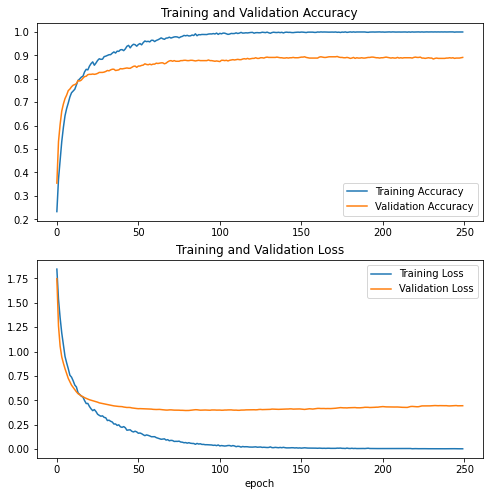

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Độ chính xác khi so sánh hai bên khá tương đồng, đạt khoảng 90%. 

#InceptionV3 GMP and dropout


In [ ]:
# building model
augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1 / 127.5, offset=-1)
])

base_model = tf.keras.applications.InceptionV3(include_top=False, weights="imagenet",input_shape=(160,160,3))

flatten = tf.keras.layers.GlobalMaxPool2D()
drop_out = tf.keras.layers.Dropout(0.2)
prediction_layer = tf.keras.layers.Dense(5)

inputs = tf.keras.Input(shape=(160,160,3))

x = augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = drop_out(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs)


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
history_gmp = model.fit(train_dataset, epochs=250, validation_data=val_dataset, verbose=1)

Epoch 1/250
12/12 [==============================] - 36s 1s/step - loss: 2.5916 - accuracy: 0.2166 - val_loss: 2.6932 - val_accuracy: 0.3256
Epoch 2/250
12/12 [==============================] - 10s 813ms/step - loss: 1.9922 - accuracy: 0.3264 - val_loss: 1.7758 - val_accuracy: 0.4346
Epoch 3/250
12/12 [==============================] - 10s 826ms/step - loss: 1.6894 - accuracy: 0.3884 - val_loss: 1.3781 - val_accuracy: 0.5599
Epoch 4/250
12/12 [==============================] - 10s 835ms/step - loss: 1.3741 - accuracy: 0.4828 - val_loss: 1.2144 - val_accuracy: 0.6185
Epoch 5/250
12/12 [==============================] - 10s 851ms/step - loss: 1.2307 - accuracy: 0.5355 - val_loss: 1.1045 - val_accuracy: 0.6458
Epoch 6/250
12/12 [==============================] - 10s 863ms/step - loss: 1.0754 - accuracy: 0.5898 - val_loss: 0.9869 - val_accuracy: 0.6839
Epoch 7/250
12/12 [==============================] - 10s 878ms/step - loss: 0.9936 - accuracy: 0.6264 - val_loss: 0.8835 - val_accuracy: 0.

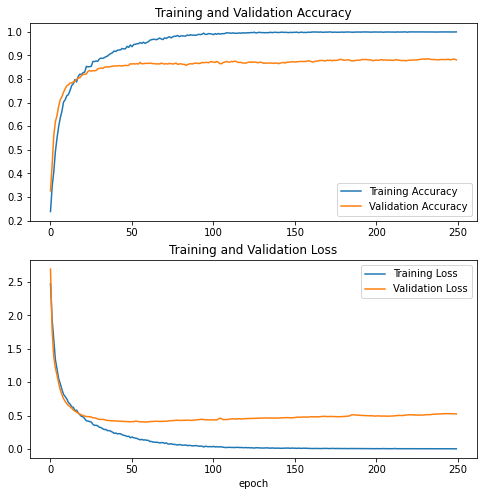

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_gmp.history['accuracy'], label='Training Accuracy')
plt.plot(history_gmp.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_gmp.history['loss'], label='Training Loss')
plt.plot(history_gmp.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Độ chính xác khi so sánh hai bên khá tương đồng, đạt khoảng 90%. 

# InceptionV3 gap and dropout

In [ ]:
# building model
augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1 / 127.5, offset=-1)
])

base_model = tf.keras.applications.InceptionV3(include_top=False, weights="imagenet",input_shape=(160,160,3))

flatten = tf.keras.layers.GlobalAveragePooling2D()
drop_out = tf.keras.layers.Dropout(0.2)
prediction_layer = tf.keras.layers.Dense(5)

inputs = tf.keras.Input(shape=(160,160,3))

x = augmentation(inputs)
x = base_model(x)
x = flatten(x)
x = drop_out(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs)


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
history_gap = model.fit(train_dataset, epochs=250, validation_data=val_dataset, verbose=1)

Epoch 1/250
12/12 [==============================] - 17s 975ms/step - loss: 1.8307 - accuracy: 0.2203 - val_loss: 2.0867 - val_accuracy: 0.2507
Epoch 2/250
12/12 [==============================] - 11s 896ms/step - loss: 1.5640 - accuracy: 0.3379 - val_loss: 1.5194 - val_accuracy: 0.4046
Epoch 3/250
12/12 [==============================] - 11s 910ms/step - loss: 1.3137 - accuracy: 0.4712 - val_loss: 1.1973 - val_accuracy: 0.5354
Epoch 4/250
12/12 [==============================] - 11s 911ms/step - loss: 1.1882 - accuracy: 0.5439 - val_loss: 1.0134 - val_accuracy: 0.6063
Epoch 5/250
12/12 [==============================] - 11s 895ms/step - loss: 1.0411 - accuracy: 0.6119 - val_loss: 0.8961 - val_accuracy: 0.6676
Epoch 6/250
12/12 [==============================] - 11s 887ms/step - loss: 0.9546 - accuracy: 0.6545 - val_loss: 0.8075 - val_accuracy: 0.7044
Epoch 7/250
12/12 [==============================] - 11s 885ms/step - loss: 0.8727 - accuracy: 0.7023 - val_loss: 0.7344 - val_accuracy:

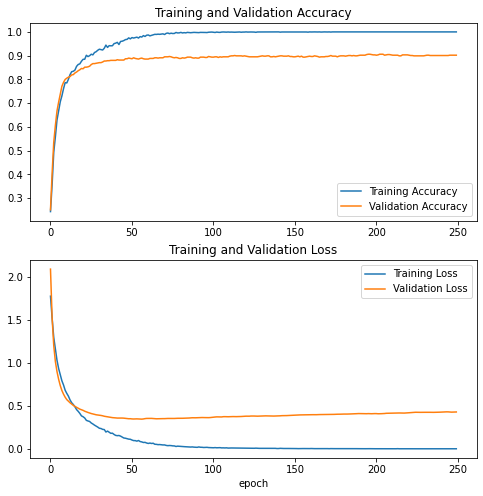

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_gap.history['accuracy'], label='Training Accuracy')
plt.plot(history_gap.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_gap.history['loss'], label='Training Loss')
plt.plot(history_gap.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Độ chính xác khi so sánh hai bên khá tương đồng, đạt khoảng 90%. 

# Nhận xét

Nhìn chung, khi thêm vào lớp drouput 0.2, thì kết quả không thay đổi khá nhiều